## Load molecule

In [1]:
!ls *.mol2

zinc_19318821.mol2


In [2]:
from rdkit import Chem
mol = Chem.MolFromMol2File('zinc_19318821.mol2')
mol

In [3]:
print('atoms count: {}'.format(len(mol.GetAtoms())))

atoms count: 14


In [4]:
', '.join(atom.GetSymbol() for atom in mol.GetAtoms())

'C, C, N, C, C, N, O, O, N, O, O, N, O, O'

In [5]:
for bond in mol.GetBonds():
    print('atoms: {} {}, type: {}, is in ring: {}'.format(
            bond.GetBeginAtom().GetSymbol(), bond.GetEndAtom().GetSymbol(), bond.GetBondType(), bond.IsInRing()))

atoms: C N, type: SINGLE, is in ring: True
atoms: C C, type: SINGLE, is in ring: True
atoms: C O, type: SINGLE, is in ring: False
atoms: C N, type: SINGLE, is in ring: True
atoms: C O, type: SINGLE, is in ring: False
atoms: N C, type: SINGLE, is in ring: True
atoms: C C, type: DOUBLE, is in ring: False
atoms: C N, type: SINGLE, is in ring: True
atoms: C N, type: SINGLE, is in ring: False
atoms: C N, type: SINGLE, is in ring: False
atoms: N O, type: DOUBLE, is in ring: False
atoms: N O, type: SINGLE, is in ring: False
atoms: N O, type: DOUBLE, is in ring: False
atoms: N O, type: SINGLE, is in ring: False


## Visualize molecule

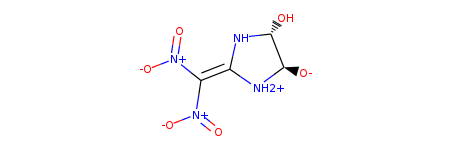

In [6]:
from rdkit.Chem.Draw import IPythonConsole
mol

## Morgan fingerprints

In [7]:
from rdkit.Chem import AllChem
ecfp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=4, nBits=100).ToBitString()
ecfp

'1100000010010001001001100110001001101010000000000000001100000010001100000011010000000001001001010000'

## Molecule representations

In [8]:
help(Chem.MolToSmiles)

Help on built-in function MolToSmiles in module rdkit.Chem.rdmolfiles:

MolToSmiles(...)
    MolToSmiles( (Mol)mol [, (bool)isomericSmiles=False [, (bool)kekuleSmiles=False [, (int)rootedAtAtom=-1 [, (bool)canonical=True [, (bool)allBondsExplicit=False [, (bool)allHsExplicit=False]]]]]]) -> str :
        Returns the canonical SMILES string for a molecule
          ARGUMENTS:
        
            - mol: the molecule
            - isomericSmiles: (optional) include information about stereochemistry in
              the SMILES.  Defaults to false.
            - kekuleSmiles: (optional) use the Kekule form (no aromatic bonds) in
              the SMILES.  Defaults to false.
            - rootedAtAtom: (optional) if non-negative, this forces the SMILES 
              to start at a particular atom. Defaults to -1.
            - canonical: (optional) if false no attempt will be made to canonicalize
              the molecule. Defaults to true.
            - allBondsExplicit: (optional) if tru

In [9]:
Chem.MolToSmiles(mol)

'O=[N+]([O-])C(=C1NC(O)C([O-])[NH2+]1)[N+](=O)[O-]'

In [10]:
Chem.MolToSmiles(mol, canonical=False)

'C1(O)C([O-])[NH2+]C(=C([N+](=O)[O-])[N+](=O)[O-])N1'

In [11]:
for line in Chem.MolToMolBlock(mol).splitlines():
    print(line)

ZINC19318821
     RDKit          3D

 14 14  0  0  0  0  0  0  0  0999 V2000
    0.6127    3.2679    0.0132 C   0  0  2  0  0  0  0  0  0  0  0  0
    1.1726    1.8353    0.0007 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.0111    0.9658    0.0074 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1477    1.7541    0.0164 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3872    1.2697    0.0187 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5436    2.1945    0.0286 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3603    3.3987    0.0346 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.6780    1.7512    0.0306 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6100   -0.1943    0.0113 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6588   -0.9550    0.0032 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7444   -0.6377    0.0134 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8468    3.1042    0.0260 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.9668    1.6021    1.1656 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0255   

## See more

https://github.com/rdkit/UGM_2015/tree/master/Notebooks